## Setup

In [87]:
import sys; sys.path.append('../' * 4)

## Libs

In [88]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from lib.preprocessing.select.split_io import split_io
# from lib.preprocessing.transform.encode.one_hot import one_hot
from lib.preprocessing.sequential import sequential as preprocessing

# Dataset

In [89]:
housing = pd.read_csv(sys.path[-1] + '/datasets/pack_1/california_housing_prices/housing.csv')

In [90]:
X, Y = preprocessing(housing.dropna(),
  [
    'one_hot("ocean_proximity", "pd")',
    'split_io("median_house_value")',
  ]
)

In [91]:
len(X) * 0.8

16346.400000000001

## Model

In [92]:
regressor = LinearRegression()

In [93]:
split = int(len(X)*0.8)

In [94]:
# regressor.fit(X[:split], Y[:split])
regressor.fit(X[:split], Y[:split])

LinearRegression()

In [95]:
predicted = regressor.predict(X[split:])
actual = np.array(Y[split:])

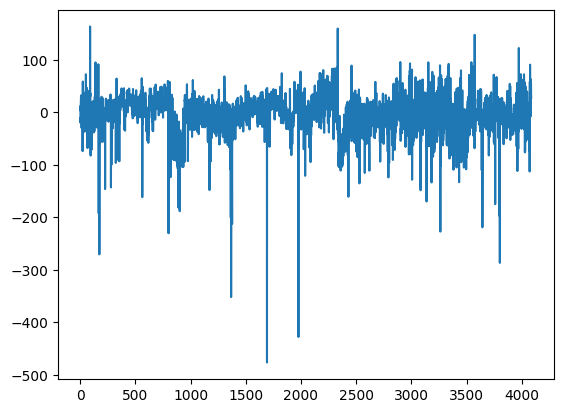

In [96]:
plt.plot((actual - predicted)/actual * 100, label='wrong %')
plt.show()


In [97]:
regressor.coef_

array([-2.61305181e+04, -2.55242384e+04,  1.11761310e+03, -7.35039330e+00,
        1.06875415e+02, -3.85509442e+01,  5.14852828e+01,  3.97603793e+04,
       -2.06619723e+04, -6.00282770e+04,  1.30760572e+05, -2.60051120e+04,
       -2.40652107e+04])